# Delta function causality directed edges

Galen Wilkerson


In [3]:
import networkx as nx
import networkit as nk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels as sm

from neuron_manifold import *

%matplotlib notebook

In [4]:
# load the mask file
filename = 'data/BASE_Ibogane_data/baseline_1/masks_neurons.mat'
baseline_1_mask = load_mat(filename)

# find the centers of each neuron
coords = find_neuron_centers(baseline_1_mask)

# draw them
# draw_neuron_centers(baseline_1_mask, coords)

filename = 'data/BASE_Ibogane_data/baseline_1/deconv.mat'
baseline_1_deconv = load_mat(filename)

# make a graph with nodes at coords and states from first timestep

In [5]:
N = baseline_1_deconv.shape[1]
G = nx.Graph()
G.add_nodes_from(range(N))

time_step = 0

# states from first timestep
binarized_firing = get_binarized_firing_at_timestep(baseline_1_deconv, time_step)

firing = binarized_firing.astype(int)

# positions from mask
pos = dict(zip(range(N), coords))

<IPython.core.display.Javascript object>


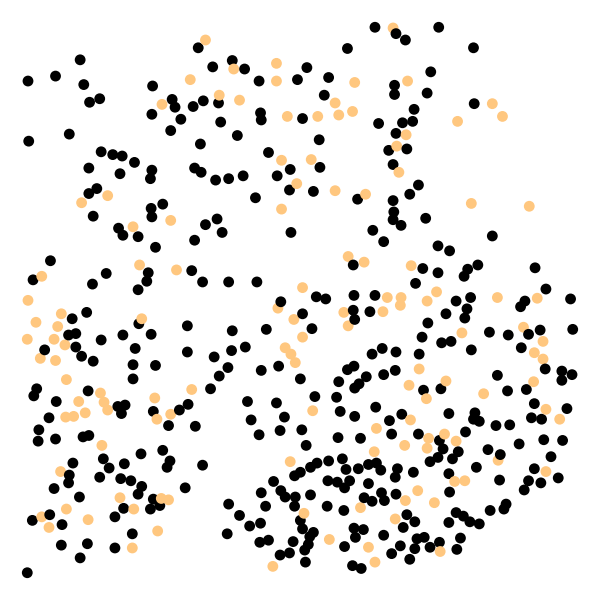

In [6]:
plt.figure(figsize=[5,5])
nx.draw(G, pos, node_color = firing, node_size = 30, cmap = plt.cm.copper);

# create edges using numerical difference in time

In [9]:
baseline_1_deconv.shape

(17000, 509)

In [10]:
binarized_firing_timeseries = get_binarized_firing_array(baseline_1_deconv)

# the change in firing over time
delta_firing_timeseries = np.diff(binarized_firing_timeseries, axis=0)[1:,:]

# create edges using temporal causation

### create directed edges from nodes having delta firing = 1 at t to nodes having delta firing = 1 at t+1

In [11]:
num_time_steps = 100

temporal_edges = np.zeros([num_time_steps,N,N])

# create directed edges from nodes having delta firing = 1 at t to nodes having delta firing = 1 at t+1
for t in range(len(temporal_edges)): #len(delta_firing_timeseries)):
    for i in range(N):
        for j in range(i,N):
            if (delta_firing_timeseries[t,i] == 1 and delta_firing_timeseries[t+1,j] == 1):
                temporal_edges[t,i,j] = 1

# draw network with causal edges at timestep 0

In [12]:
timestep = 0
G = nx.from_numpy_array(temporal_edges[time_step],create_using=nx.DiGraph)

<IPython.core.display.Javascript object>


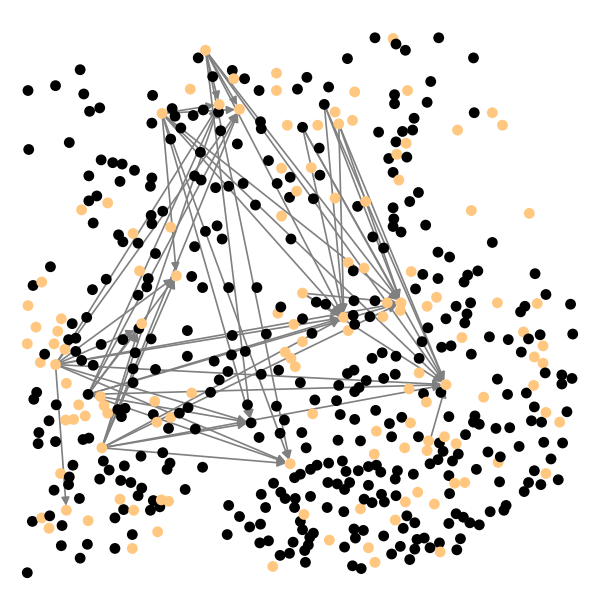

In [13]:
plt.figure(figsize=[5,5])
nx.draw(G, pos, node_color = firing, node_size = 30, cmap = plt.cm.copper, edge_color = 'grey')